In [50]:
import copy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

import sys
sys.path.insert(1, 'Algorithms')
from betaAcyclic import checkBetaAcyclic
from grahamsAlgorithm import GYO

In [51]:
# Draw hypergraph, line graph, dual of the hypergraph, and line graph of the dual
def check(scenes):
    H = hnx.Hypergraph(scenes)

    G=nx.grid_2d_graph(4,4) 
    
    plt.subplot(221)
    drawHypergraph(H)
    
    plt.subplot(222)
    G1 = drawLinegraph(H)

    scenesCopy = copy.deepcopy(scenes)
    
    print('Original Hypergraph: ')
    print('Alpha-acyclic: ', GYO(scenes))
    print('Beta-acyclic: ', checkBetaAcyclic(scenesCopy))
    print('The line graph is chordal: ', nx.is_chordal(G1))
    
    D = H.dual()
    
    plt.subplot(223)
    drawHypergraph(D)
    
    plt.subplot(224)
    G2 = drawLinegraph(D)

    print('\nDual of the Hypergraph: ')
    print('Dual: ', D.incidence_dict)
    dualCopy = copy.deepcopy(D.incidence_dict)
    print('Alpha-acyclic: ', GYO(D.incidence_dict))
    print('Beta-acyclic: ', checkBetaAcyclic(dualCopy))
    print('The line graph is chordal: ', nx.is_chordal(G2))

# Draw hypergraph
def drawHypergraph(H):
    kwargs = {'layout_kwargs': {'seed': 16}, 'with_node_counts': False, 'with_edge_labels': True}
    
    hnx.drawing.draw(H,
        node_labels_kwargs={
            'fontsize': 12
        },
        edge_labels_kwargs={
            'fontsize': 16
        },
        edges_kwargs={
            'linewidths': 2
        },
        **kwargs
    )

# Draw line graph and check if it is chordal
def drawLinegraph(H):
    G = H.get_linegraph()

    nx.draw(
        G, edge_color='black', width=1, linewidths=1,
        node_size=400, font_size=12, node_color='pink', alpha=1,
        labels={node: node for node in G.nodes()} 
    )
    return G

# Example from Tractability Beyond...

This is an example from a paper by Matthias Lazinger about nest-set width. 

This hypergraph is not $\alpha$-acyclic or $\beta$-acyclic, but has a 2-NEO:
$$
O = (\{c,f\}, \{b,e\}, \{a,d\})
$$

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'a': ['e1', 'e2'], 'b': ['e1', 'e4'], 'c': ['e1', 'e3', 'e5'], 'd': ['e1', 'e2', 'e3'], 'e': ['e2', 'e4'], 'f': ['e3', 'e5']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


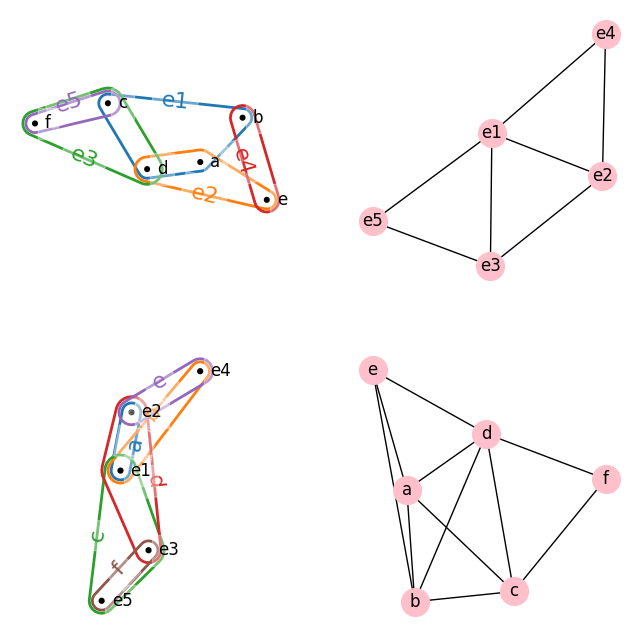

In [52]:
scenes = {
    'e1': ['a','b','c','d'],
    'e2': ['a','d','e'],
    'e3': ['d','c','f'],
    'e4': ['b','e'],
    'e5': ['c','f']
}

check(scenes)

# $\alpha$-acyclic Examples

## Example 1

From *Hypergraph Theory: An Introduction* (pg 73, Fig 4.6). This graph is $\alpha$-acyclic, $\beta$-acyclic, so it has a 1-NEO.

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  True
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'a': ['e1'], 'b': ['e1', 'e2', 'e4'], 'c': ['e1'], 'd': ['e1', 'e2', 'e3', 'e4'], 'e': ['e2'], 'f': ['e2'], 'g': ['e2', 'e3', 'e4'], 'i': ['e3'], 'j': ['e3'], 'k': ['e3']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


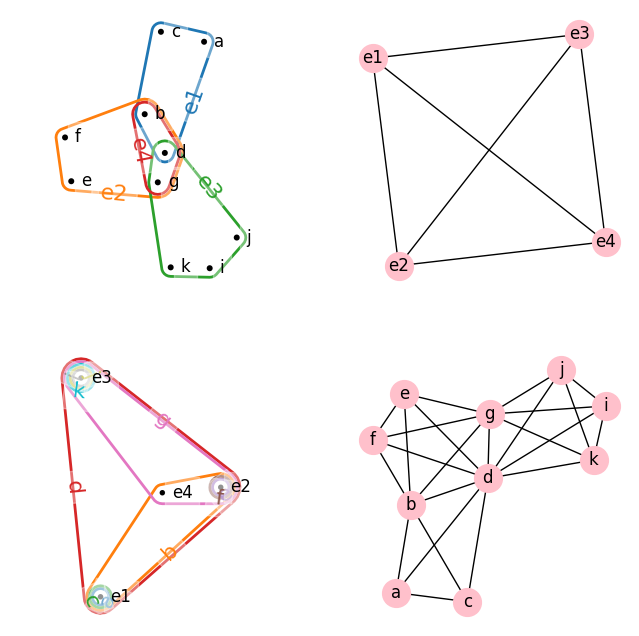

In [53]:
scenes = {
    'e1': ['a', 'b', 'c', 'd'],
    'e2': ['b', 'd', 'e', 'f', 'g'],
    'e3': ['d', 'g', 'i', 'j', 'k'],
    'e4': ['b', 'd', 'g']
}

check(scenes)

## Example 2

From *Hypergraph Theory: An Introduction* (pg 74, Fig. 4.8). This graph is $\alpha$-acyclic, NOT $\beta$-acyclic, but has a 2-NEO:
$$
O = (\{a,b\}, \{m,n\}, \{k,i\}, \{f,l\}, \{g,h\}, \{c,e\}, \{d.j\})
$$

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  False

Dual of the Hypergraph: 
Dual:  {'a': ['e1'], 'b': ['e1'], 'c': ['e1'], 'd': ['e1', 'e2', 'e5'], 'e': ['e1', 'e5'], 'f': ['e1', 'e4', 'e5'], 'g': ['e2', 'e5'], 'h': ['e2', 'e3', 'e5'], 'i': ['e5'], 'j': ['e4', 'e5'], 'k': ['e5'], 'l': ['e3', 'e4', 'e5'], 'm': ['e3'], 'n': ['e3']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


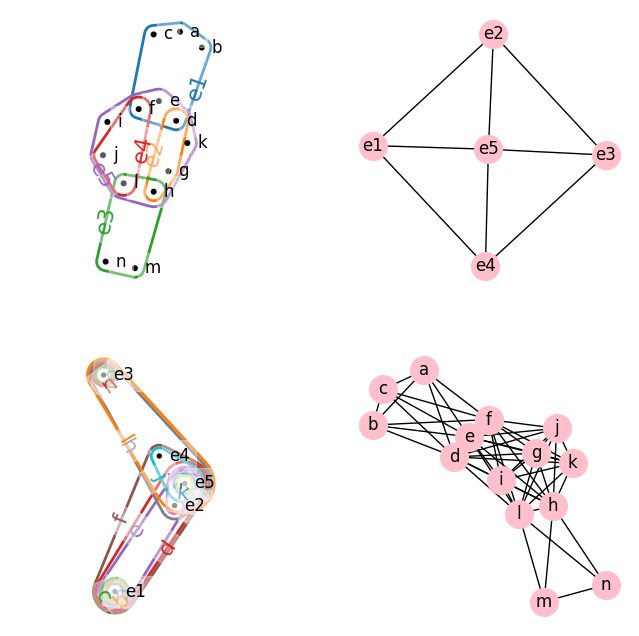

In [54]:
scenes = {
    'e1': ['a', 'b', 'c', 'd', 'e', 'f'],
    'e2': ['d', 'g', 'h'],
    'e3': ['h', 'l', 'm', 'n'],
    'e4': ['f', 'j', 'l'],
    'e5': ['d', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
}

check(scenes)

## Example 3

From *The complexity of Boolean Conjuctive Queries with Intersection Joins* (pg 61, Fig 4). This graph is $\alpha$-acyclic, has no Berge-cycle, and is $\beta$-acyclic, so it has a 1-NEO. 

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  True
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'a': ['e1', 'e2'], 'b': ['e1'], 'c': ['e2', 'e3', 'e4'], 'd': ['e3'], 'e': ['e4']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


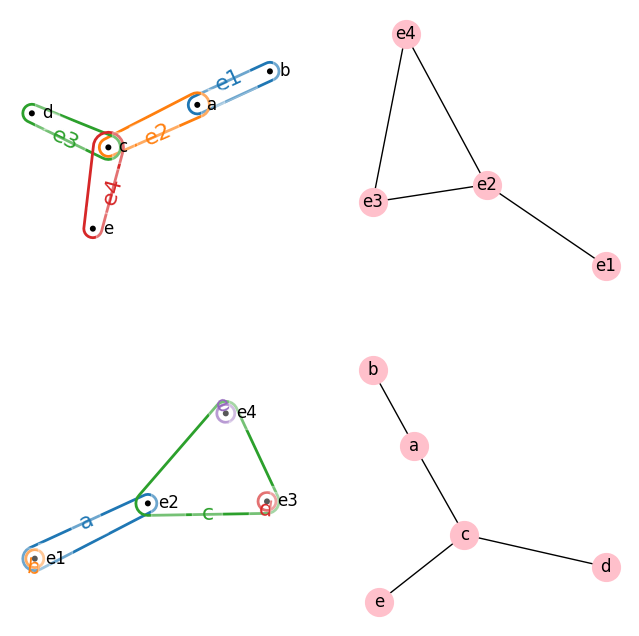

In [55]:
scenes = {
    'e1': ['a', 'b'],
    'e2': ['a', 'c'],
    'e3': ['c', 'd'],
    'e4': ['c', 'e']
}

check(scenes)

## Example 4

This graph is $\alpha$-acyclic and not $\beta$-acyclic. It does have a 2-NEO
$$
O = (\{b, d\}, \{a, c\})
$$

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  True
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'a': ['e1', 'e2', 'e3', 'e4'], 'b': ['e1', 'e3', 'e4'], 'c': ['e2', 'e3'], 'd': ['e4']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


/Users/linneacaraballo/Library/Python/3.9/lib/python/site-packages/networkx/drawing/nx_pylab.py:304: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


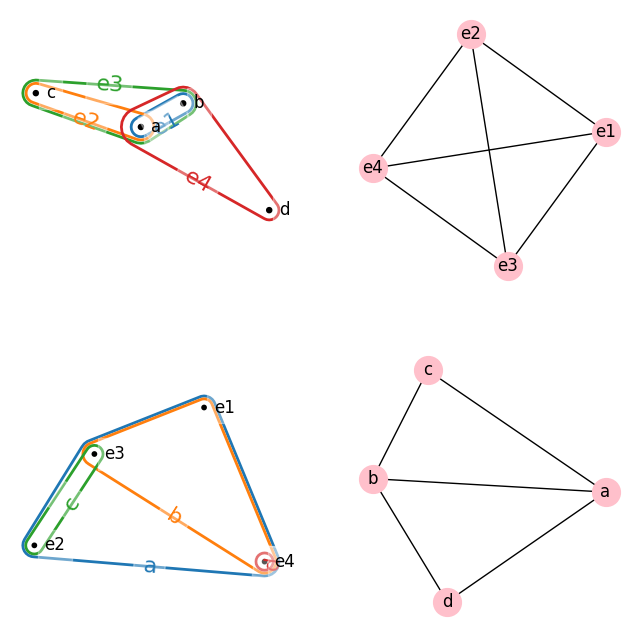

In [56]:
scenes = {
    'e1': ['a', 'b'],
    'e2': ['a', 'c'],
    'e3': ['a', 'b', 'c'],
    'e4': ['a', 'b', 'd']
}

check(scenes)

## Example 5

This graph is $\alpha$-acyclic and $\beta$-acyclic so it has a 1-NEO.

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  True
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'a': ['e1'], 'b': ['e1', 'e2'], 'c': ['e1', 'e2', 'e3'], 'd': ['e3'], 'e': ['e3']}
Alpha-acyclic:  True
Beta-acyclic:  True
The line graph is chordal:  True


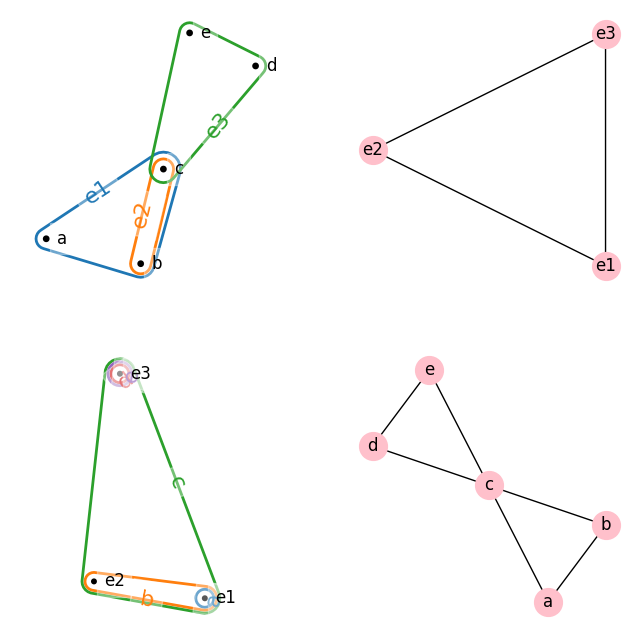

In [57]:
scenes = {
    'e1': ['a', 'b', 'c'],
    'e2': ['b', 'c'],
    'e3': ['c', 'd', 'e']
}

check(scenes)

# Cycle
## Example 1

Not $\alpha$-acyclic or $\beta$-acyclic. No $k$-NEO.

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  False

Dual of the Hypergraph: 
Dual:  {'a': ['e1', 'e6'], 'b': ['e1', 'e2'], 'c': ['e2', 'e3'], 'd': ['e2'], 'e': ['e3'], 'f': ['e3', 'e4'], 'g': ['e6'], 'h': ['e5', 'e6'], 'i': ['e4', 'e5'], 'j': ['e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  False


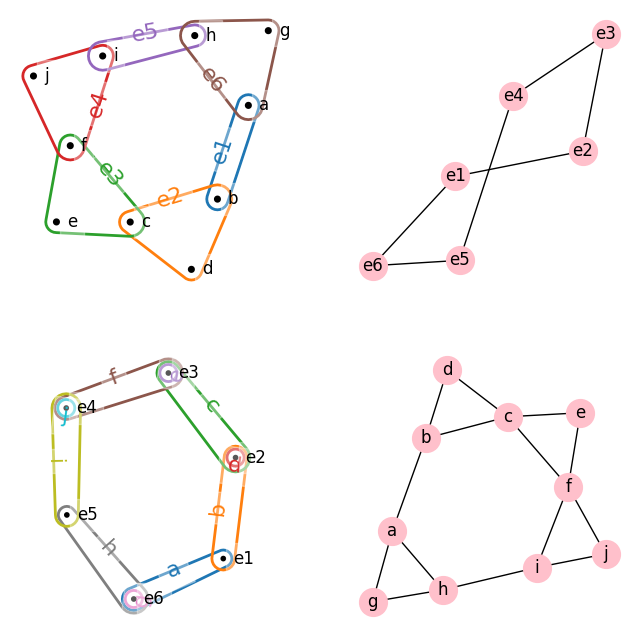

In [58]:
scenes = {
    'e1': ['a', 'b'],
    'e2': ['b', 'c', 'd'],
    'e3': ['c', 'e', 'f'],
    'e4': ['f', 'i', 'j'],
    'e5': ['h', 'i'],
    'e6': ['a', 'g', 'h']
}

check(scenes)

## Example 2

From *Hypergraph Theory: An Introduction* (pg 88, Fig. 5.2). This graph is not $\alpha$-acyclic, NOT $\beta$-acyclic, no $k$-NEO.


/Users/linneacaraballo/Library/Python/3.9/lib/python/site-packages/networkx/drawing/nx_pylab.py:304: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'a': ['e1', 'e4'], 'b': ['e1'], 'c': ['e1'], 'd': ['e1', 'e2'], 'e': ['e3', 'e4'], 'f': ['e2', 'e3'], 'g': ['e2'], 'h': ['e2', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  False


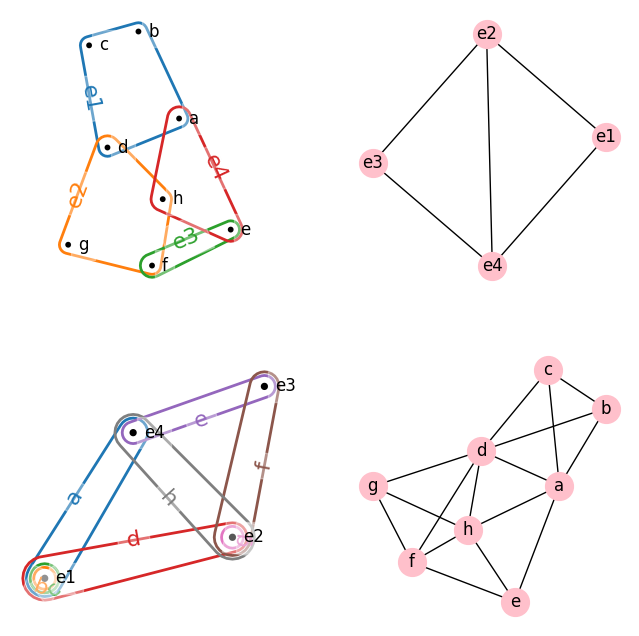

In [59]:
scenes = {
    'e1': ['a', 'b', 'c', 'd'],
    'e2': ['d', 'f', 'g', 'h'],
    'e3': ['e', 'f'],
    'e4': ['a', 'e', 'h']
}

check(scenes)

# Normal Hypergraph

From *Hypergraph Theory: An Introduction* (pg 69, Fig. 4.4). This graph is $\alpha$-acyclic, NOT $\beta$-acyclic, no $k$-NEO

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'a': ['e1'], 'b': ['e1'], 'c': ['e1'], 'd': ['e1', 'e2'], 'e': ['e1', 'e2', 'e4'], 'f': ['e1', 'e4'], 'g': ['e2'], 'h': ['e2', 'e4'], 'i': ['e4'], 'j': ['e2', 'e3'], 'k': ['e2', 'e3'], 'l': ['e3'], 'm': ['e3'], 'n': ['e3']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


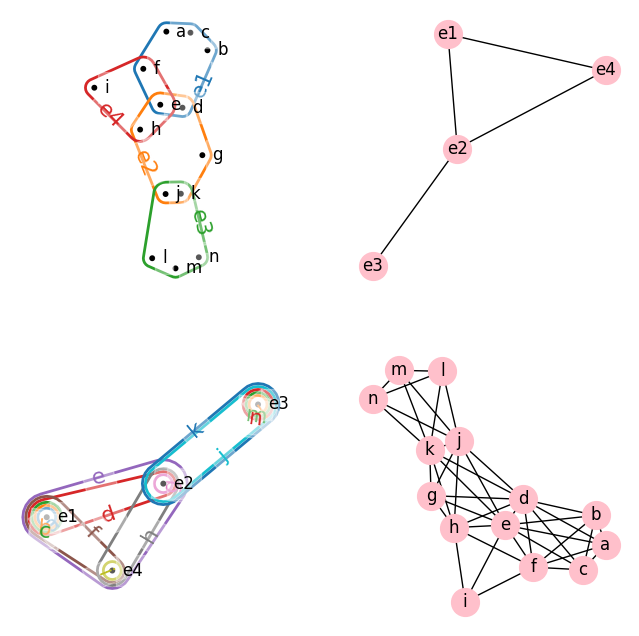

In [60]:
scenes = {
    'e1': ['a', 'b', 'c', 'd', 'e', 'f'],
    'e2': ['d', 'e', 'g', 'h', 'j', 'k'],
    'e3': ['j', 'k', 'l', 'm', 'n'],
    'e4': ['e', 'f', 'h', 'i']
}

check(scenes)

# Beta Triangle

$\alpha$-acyclic but not $\beta$-acyclic, no $k$-NEO

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'x': ['e1', 'e2', 'e4'], 'y': ['e1', 'e2', 'e3'], 'z': ['e1', 'e3', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


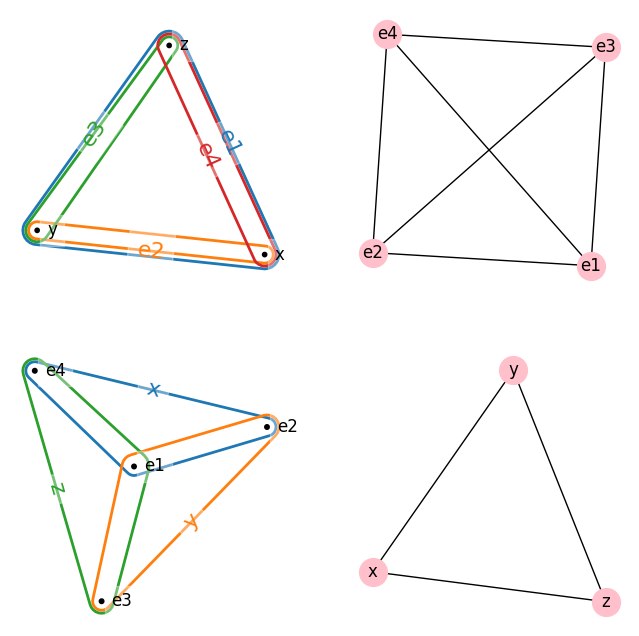

In [61]:
scenes = {
    'e1': ['x', 'y', 'z'],
    'e2': ['x', 'y'],
    'e3': ['y', 'z'],
    'e4': ['x', 'z']
}

check(scenes)

# Tetrahedron

Not $\alpha$-acyclic, not $\beta$-acyclic, no $k$-NEO

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'t': ['e2', 'e3', 'e4'], 'x': ['e1', 'e2', 'e3'], 'y': ['e1', 'e3', 'e4'], 'z': ['e1', 'e2', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


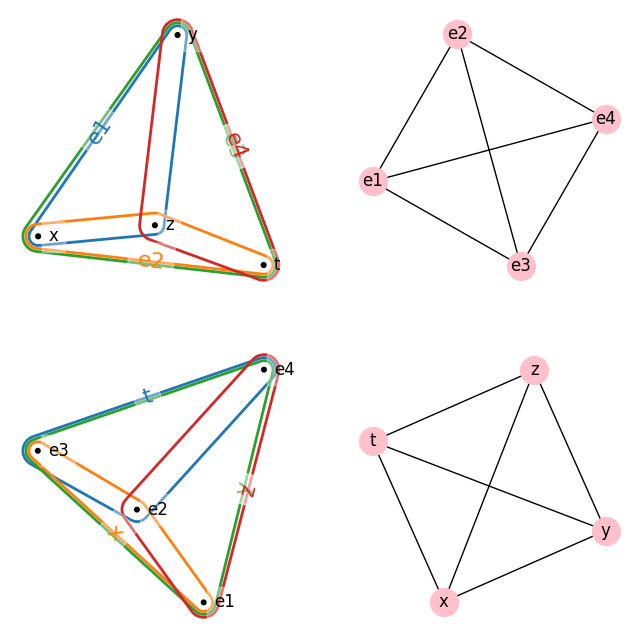

In [62]:
scenes = {
    'e1': ['x', 'y', 'z'],
    'e2': ['x', 't', 'z'],
    'e3': ['x', 'y', 't'],
    'e4': ['y', 't', 'z']
}

check(scenes)

# Square

Not $\alpha$-acyclic, not $\beta$-acyclic, no $k$-NEO

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  False

Dual of the Hypergraph: 
Dual:  {'t': ['e3', 'e4'], 'x': ['e1', 'e4'], 'y': ['e1', 'e2'], 'z': ['e2', 'e3']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  False


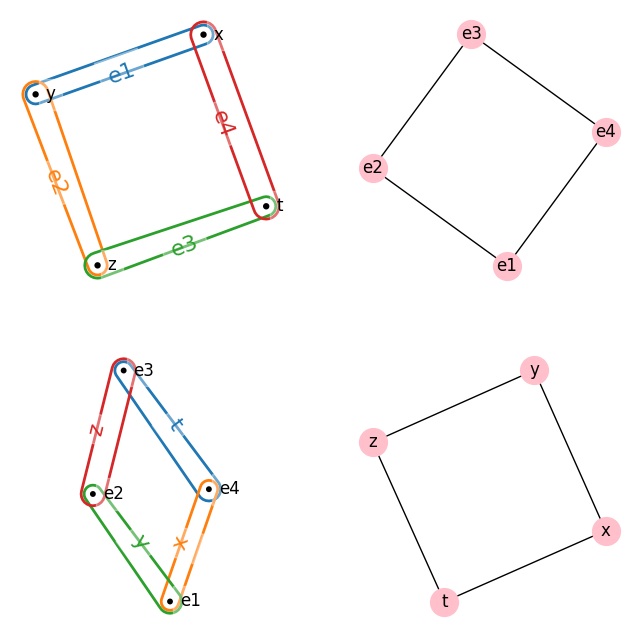

In [63]:
scenes = {
    'e1': ['x', 'y'],
    'e2': ['y', 'z'],
    'e3': ['t', 'z'],
    'e4': ['x', 't']
}

check(scenes)

# Les Mis Example

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  False

Dual of the Hypergraph: 
Dual:  {'BM': [2, 3, 4], 'BR': [4], 'CC': [4], 'CH': [3, 4], 'CN': [4], 'FN': [0, 2], 'GP': [5, 6, 7], 'JA': [2], 'JU': [3, 4], 'JV': [1, 3, 4], 'MA': [7], 'MP': [6], 'TH': [0, 1, 5]}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  False


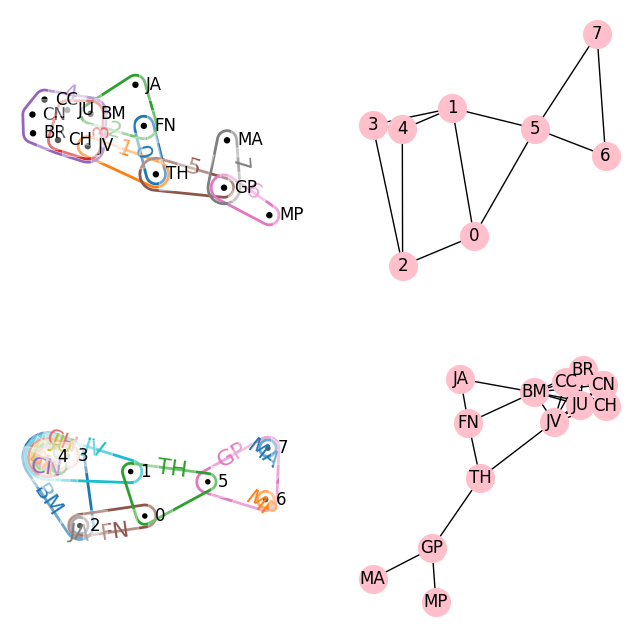

In [64]:
scenes = {
    0: ['FN', 'TH'],
    1: ['TH', 'JV'],
    2: ['BM', 'FN', 'JA'],
    3: ['JV', 'JU', 'CH', 'BM'],
    4: ['JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'],
    5: ['TH', 'GP'],
    6: ['GP', 'MP'],
    7: ['MA', 'GP'],
}

check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'a': ['e1', 'e7'], 'b': ['e1', 'e2', 'e5', 'e6'], 'c': ['e1', 'e3', 'e4'], 'd': ['e1', 'e4', 'e7'], 'e': ['e2', 'e6', 'e7'], 'f': ['e5', 'e6'], 'g': ['e3', 'e4'], 'h': ['e3', 'e4'], 'i': ['e2', 'e5', 'e6']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


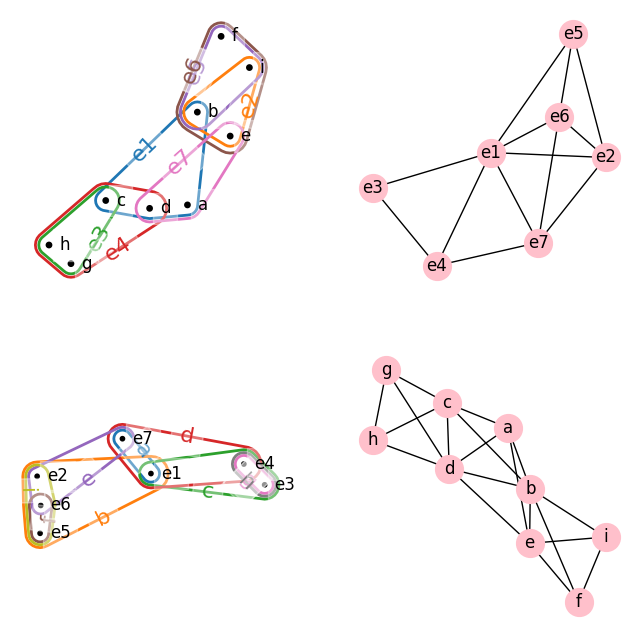

In [65]:
scenes = {
    'e1': ['a', 'b', 'c', 'd'],
    'e2': ['b', 'e', 'i'],
    'e3': ['c', 'g', 'h'],
    'e4': ['c','d', 'g', 'h'],
    'e5': ['b', 'f', 'i'],
    'e6': ['b', 'e', 'f', 'i'],
    'e7': ['a', 'd', 'e']
}

check(scenes)

/Users/linneacaraballo/Library/Python/3.9/lib/python/site-packages/networkx/drawing/nx_pylab.py:304: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {'1': ['e1', 'e3'], '2': ['e1', 'e3'], '3': ['e1', 'e2', 'e3'], '4': ['e1', 'e4'], '5': ['e1', 'e4'], '6': ['e1', 'e4'], '7': ['e2', 'e5'], '8': ['e2', 'e5'], '9': ['e2', 'e5']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


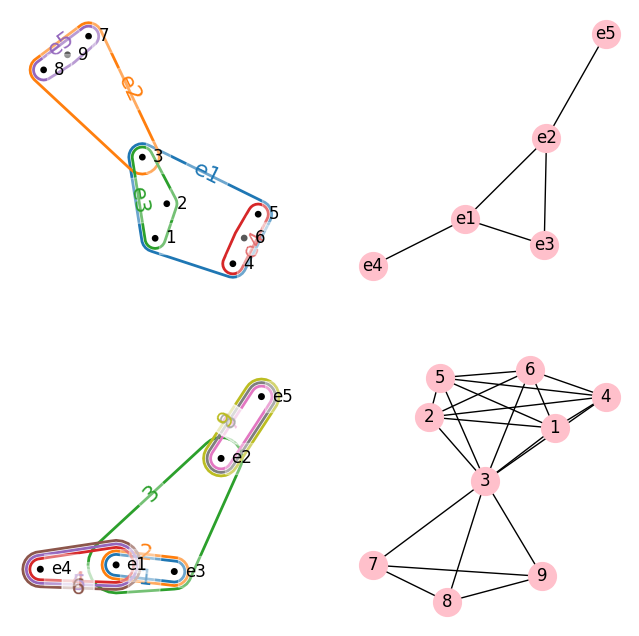

In [66]:
# NOT WORKING 
# NOT beta acyclic, YES alpha acyclic

scenes = {
    'e1': ['1','2','3','4','5','6'],
    'e2': ['3','7','8','9'],
    'e3': ['1','2','3'],
    'e4': ['4','5','6'],
    'e5': ['7','8','9']
}

check(scenes)

# 6 Vertices, 5 Hyperedges

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e1', 'e4'], 2: ['e0', 'e2', 'e3', 'e4'], 3: ['e2', 'e3'], 4: ['e0', 'e2', 'e3'], 5: ['e0', 'e1', 'e2', 'e4'], 6: ['e0', 'e3']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


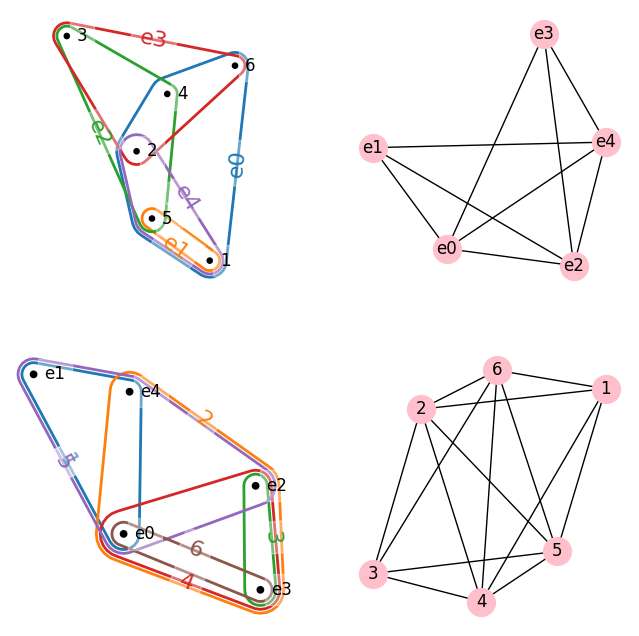

In [67]:
scenes = {'e0': [2, 5, 6, 4, 1], 'e1': [1, 5], 'e2': [3, 2, 4, 5], 'e3': [6, 2, 4, 3], 'e4': [5, 2, 1]}

check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e1'], 2: ['e1', 'e2'], 3: ['e0', 'e1', 'e3', 'e4'], 4: ['e2', 'e3', 'e4'], 5: ['e0', 'e1'], 6: ['e0', 'e3']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  False


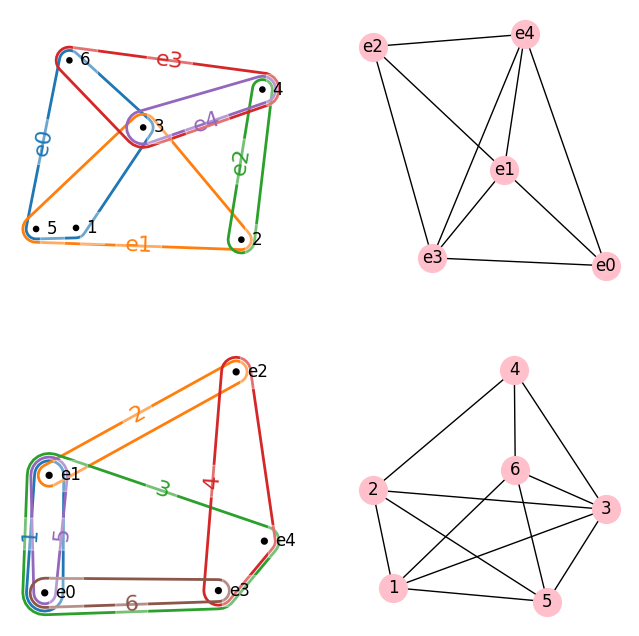

In [68]:
scenes = {'e0': [5, 6, 1, 3], 'e1': [2, 1, 3, 5], 'e2': [2, 4], 'e3': [6, 4, 3], 'e4': [3, 4]}

check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e1', 'e3', 'e4'], 2: ['e0', 'e2', 'e3', 'e4'], 3: ['e0', 'e1'], 4: ['e0', 'e2', 'e4'], 5: ['e0', 'e2', 'e3'], 6: ['e0', 'e1', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


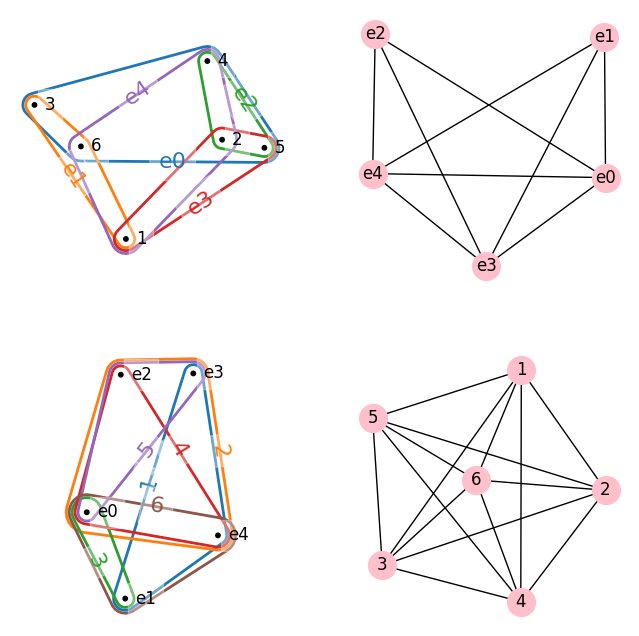

In [69]:
scenes = {'e0': [5, 6, 2, 4, 3], 'e1': [3, 6, 1], 'e2': [4, 5, 2], 'e3': [1, 5, 2], 'e4': [2, 1, 4, 6]}
check(scenes)

In [70]:
scenes = {'e0': [1, 4, 2], 'e1': [5, 2], 'e2': [6, 5, 1, 3], 'e3': [2, 4, 5], 'e4': [4, 3, 1]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e2', 'e4'], 2: ['e0', 'e1', 'e3'], 3: ['e2', 'e4'], 4: ['e0', 'e3', 'e4'], 5: ['e1', 'e2', 'e3'], 6: ['e2']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e2'], 3: ['e1', 'e2', 'e3'], 4: ['e1', 'e4'], 5: ['e3', 'e4'], 6: ['e0', 'e1', 'e2', 'e3']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


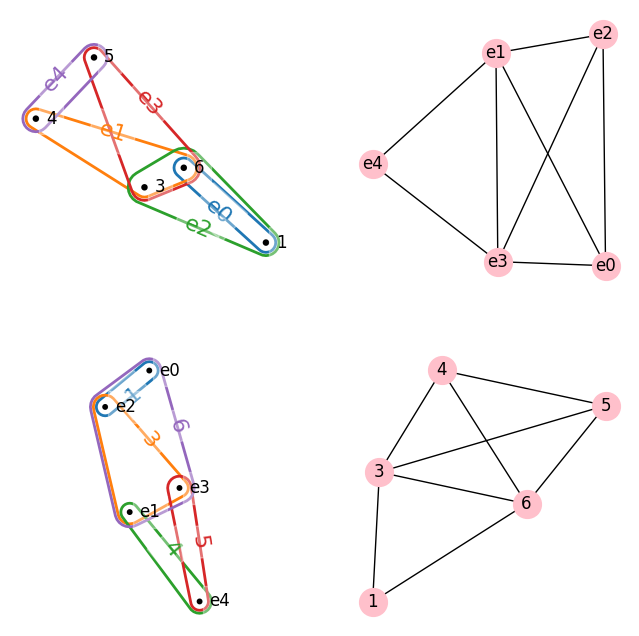

In [71]:
scenes = {'e0': [6, 1], 'e1': [4, 6, 3], 'e2': [6, 1, 3], 'e3': [3, 6, 5], 'e4': [5, 4]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e1', 'e2', 'e4'], 2: ['e3', 'e4'], 3: ['e0', 'e1', 'e4'], 4: ['e1', 'e2', 'e3'], 6: ['e0', 'e1', 'e2']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


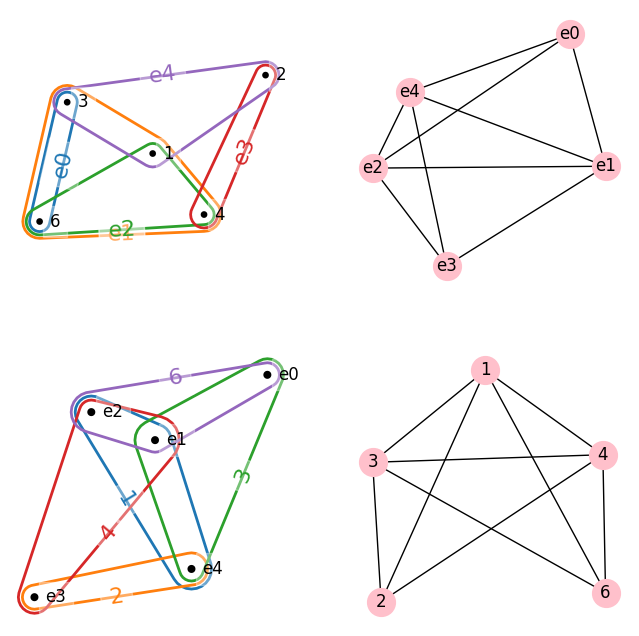

In [72]:
scenes = {'e0': [6, 3], 'e1': [6, 1, 3, 4], 'e2': [4, 1, 6], 'e3': [2, 4], 'e4': [3, 2, 1]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e2', 'e3'], 2: ['e1', 'e2', 'e3'], 3: ['e1', 'e4'], 4: ['e1', 'e2', 'e3'], 5: ['e0', 'e1', 'e2'], 6: ['e0', 'e2', 'e3', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


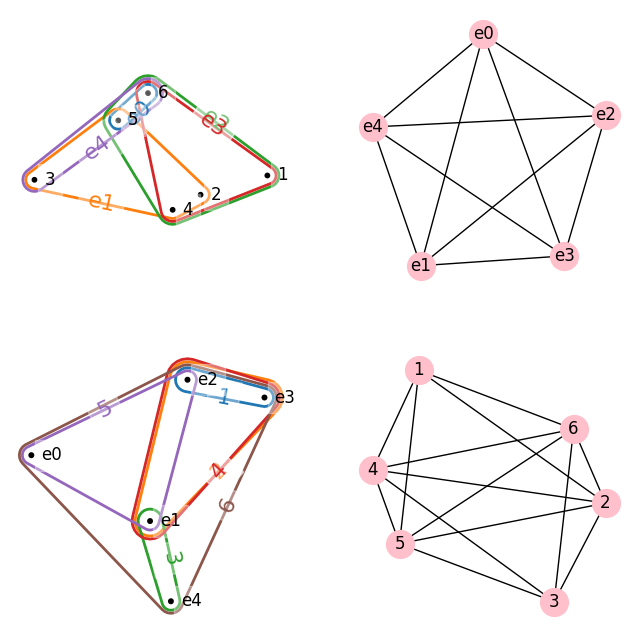

In [73]:
scenes = {'e0': [5, 6], 'e1': [2, 5, 4, 3], 'e2': [6, 2, 5, 1, 4], 'e3': [6, 1, 4, 2], 'e4': [3, 6]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {2: ['e0', 'e1', 'e2', 'e3', 'e4'], 3: ['e0', 'e4'], 4: ['e0', 'e1', 'e2'], 5: ['e1', 'e3', 'e4'], 6: ['e0', 'e1', 'e4']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


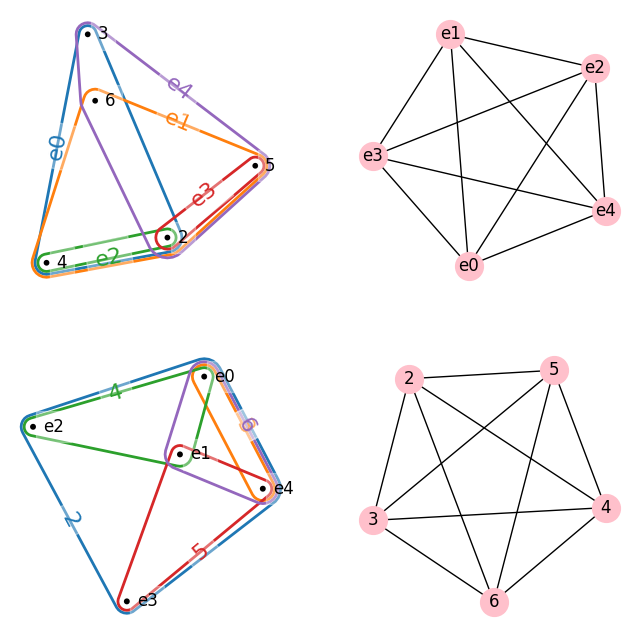

In [74]:
scenes = {'e0': [2, 4, 3, 6], 'e1': [5, 4, 6, 2], 'e2': [4, 2], 'e3': [2, 5], 'e4': [2, 5, 6, 3]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e3', 'e4'], 2: ['e4'], 3: ['e0', 'e2'], 4: ['e1', 'e2', 'e4'], 5: ['e0', 'e1', 'e3', 'e4'], 6: ['e0', 'e2']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


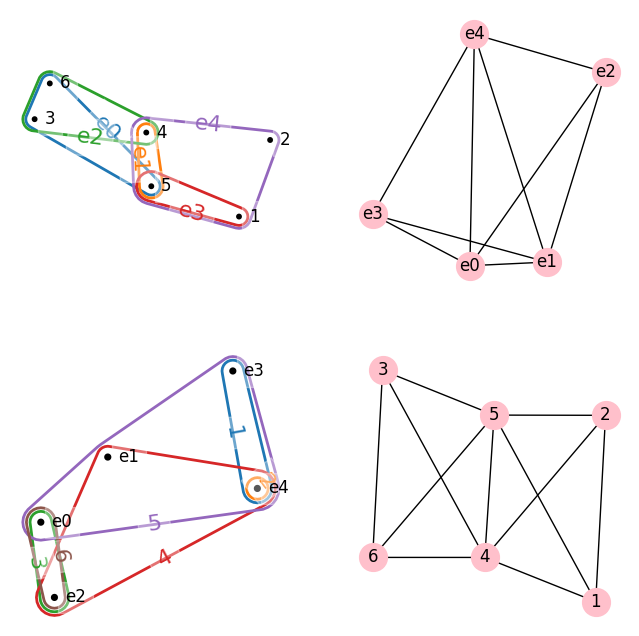

In [75]:
scenes = {'e0': [3, 6, 5], 'e1': [5, 4], 'e2': [6, 3, 4], 'e3': [5, 1], 'e4': [2, 1, 5, 4]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0'], 2: ['e2', 'e3', 'e4'], 3: ['e0', 'e2'], 4: ['e0', 'e4'], 5: ['e0', 'e1', 'e2', 'e3'], 6: ['e0', 'e1', 'e2', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


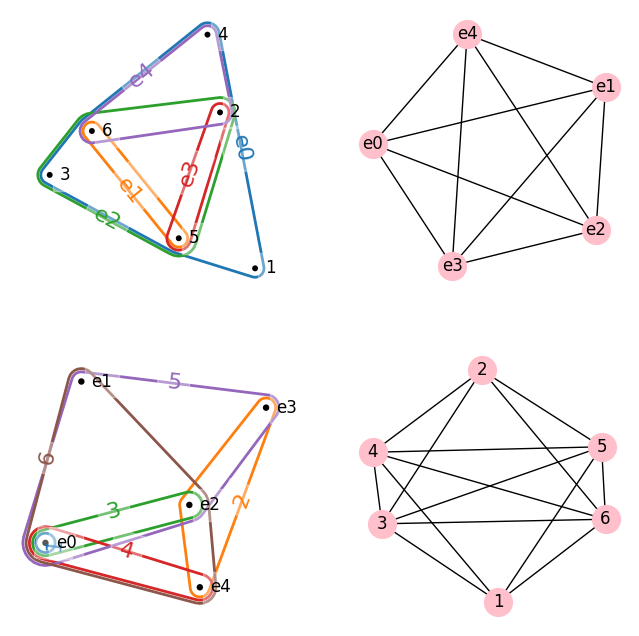

In [76]:
scenes = {'e0': [3, 1, 4, 6, 5], 'e1': [5, 6], 'e2': [2, 5, 6, 3], 'e3': [2, 5], 'e4': [4, 6, 2]}
check(scenes)

In [77]:
scenes = {'e0': [1, 5, 3, 2, 4], 'e1': [3, 2, 6], 'e2': [4, 2, 5], 'e3': [4, 3], 'e4': [6, 5, 1, 4, 2]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e4'], 2: ['e0', 'e1', 'e2', 'e4'], 3: ['e0', 'e1', 'e3'], 4: ['e0', 'e2', 'e3', 'e4'], 5: ['e0', 'e2', 'e4'], 6: ['e1', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


In [78]:
scenes = {'e0': [4, 2, 6], 'e1': [3, 1, 4, 6], 'e2': [6, 5], 'e3': [2, 3, 1], 'e4': [4, 6, 1]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e1', 'e3', 'e4'], 2: ['e0', 'e3'], 3: ['e1', 'e3'], 4: ['e0', 'e1', 'e4'], 5: ['e2'], 6: ['e0', 'e1', 'e2', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e1', 'e2', 'e3', 'e4'], 2: ['e2', 'e4'], 3: ['e0', 'e1', 'e2'], 4: ['e1', 'e2', 'e3'], 5: ['e0', 'e2', 'e3', 'e4'], 6: ['e0', 'e1']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


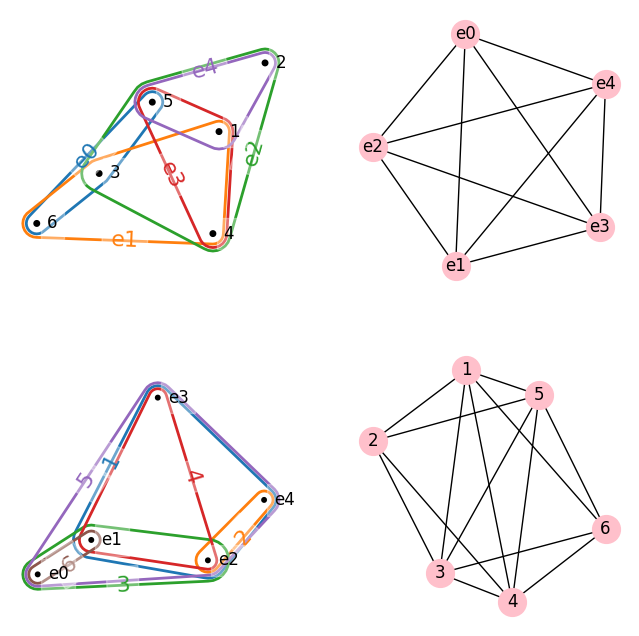

In [79]:
scenes = {'e0': [6, 5, 3], 'e1': [6, 3, 1, 4], 'e2': [5, 1, 4, 2, 3], 'e3': [1, 5, 4], 'e4': [2, 1, 5]}
check(scenes)

In [80]:
scenes = {'e0': [2, 1], 'e1': [2, 5, 6, 3], 'e2': [6, 1, 5], 'e3': [3, 2], 'e4': [6, 1]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e2', 'e4'], 2: ['e0', 'e1', 'e3'], 3: ['e1', 'e3'], 5: ['e1', 'e2'], 6: ['e1', 'e2', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e1', 'e2'], 2: ['e1', 'e4'], 3: ['e0', 'e1', 'e2', 'e3', 'e4'], 4: ['e0', 'e2', 'e3', 'e4'], 5: ['e0', 'e2', 'e4'], 6: ['e1', 'e2', 'e4']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


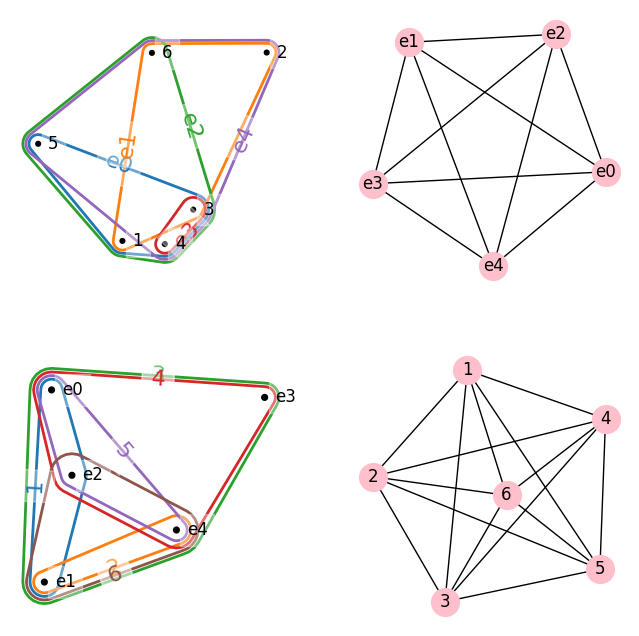

In [81]:
scenes = {'e0': [1, 3, 4, 5], 'e1': [3, 6, 2, 1], 'e2': [3, 5, 4, 6, 1], 'e3': [3, 4], 'e4': [3, 5, 2, 4, 6]}
check(scenes)

In [82]:
import networkx as nx
import hypernetx as hnx

scenes = {'e0': [1, 3, 4, 5], 'e1': [3, 6, 2, 1], 'e2': [3, 5, 4, 6, 1], 'e3': [3, 4], 'e4': [3, 5, 2, 4, 6]}

H = hnx.Hypergraph(scenes)

G = H.get_linegraph()

print(list(G.nodes()))

# Replace 'node_to_check' with the specific node you want to get the degree for
node_to_check = 'e0'

# Check if the node exists in the graph before finding its degree
if node_to_check in G:
    degree = G.degree(node_to_check)
    print(f"The degree of node {node_to_check} in G is: {degree}")
else:
    print(f"Node {node_to_check} is not in the graph G")


['e0', 'e1', 'e2', 'e3', 'e4']
The degree of node e0 in G is: 4


Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e2', 'e3', 'e4'], 2: ['e0', 'e1', 'e2', 'e4'], 3: ['e0', 'e1', 'e2', 'e3', 'e4'], 4: ['e2', 'e3', 'e4'], 5: ['e1', 'e2', 'e3'], 6: ['e0', 'e1', 'e3']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


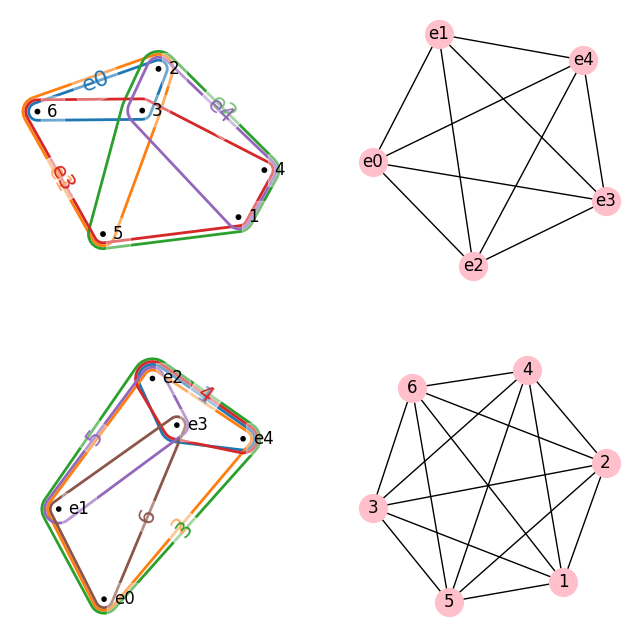

In [83]:
scenes = {'e0': [3, 6, 2], 'e1': [3, 6, 2, 5], 'e2': [2, 3, 5, 1, 4], 'e3': [3, 6, 5, 4, 1], 'e4': [2, 3, 1, 4]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e1', 'e2', 'e3'], 2: ['e0', 'e1', 'e2', 'e3'], 3: ['e0', 'e3'], 4: ['e0', 'e2', 'e3', 'e4'], 5: ['e0', 'e1', 'e4'], 6: ['e1', 'e3']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


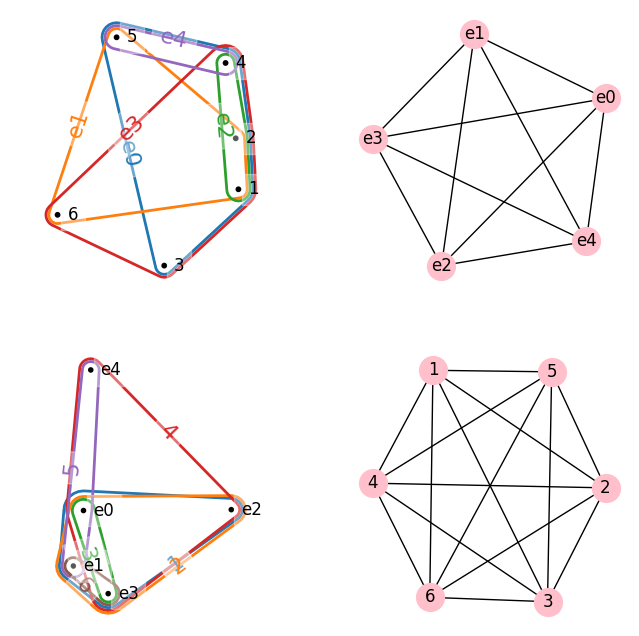

In [84]:
scenes = {'e0': [5, 2, 4, 1, 3], 'e1': [6, 5, 1, 2], 'e2': [4, 1, 2], 'e3': [1, 3, 4, 6, 2], 'e4': [5, 4]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e2', 'e3'], 2: ['e2', 'e4'], 3: ['e1', 'e2', 'e4'], 4: ['e1', 'e3', 'e4'], 5: ['e0', 'e2', 'e4'], 6: ['e2', 'e3']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


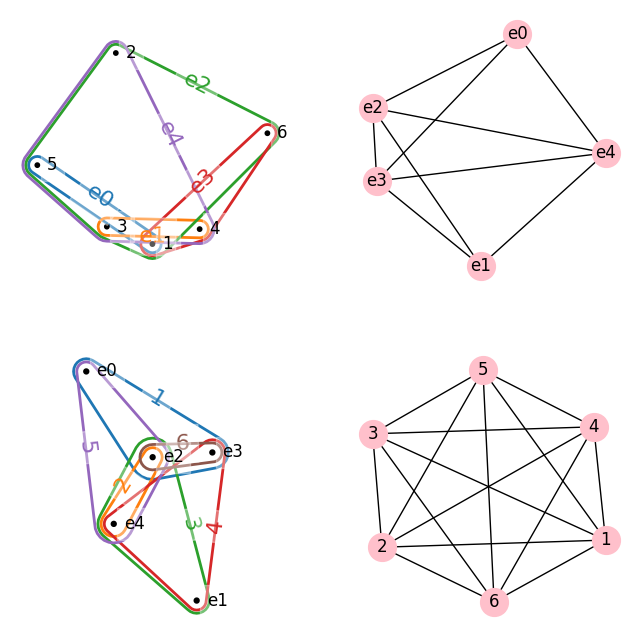

In [85]:
scenes = {'e0': [5, 1], 'e1': [3, 4], 'e2': [5, 3, 1, 2, 6], 'e3': [6, 4, 1], 'e4': [4, 2, 3, 5]}
check(scenes)

In [86]:
scenes = {'e0': [6, 5, 4, 1], 'e1': [5, 2, 4, 3, 1, 6], 'e2': [3, 2], 'e3': [5, 3, 1, 6, 4], 'e4': [2, 5, 3]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e1', 'e3'], 2: ['e1', 'e2', 'e4'], 3: ['e1', 'e2', 'e3', 'e4'], 4: ['e0', 'e1', 'e3'], 5: ['e0', 'e1', 'e3', 'e4'], 6: ['e0', 'e1', 'e3']}
Alpha-acyclic:  True
Beta-acyclic:  True
The line graph is chordal:  True


Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e1', 'e3', 'e4'], 2: ['e0', 'e1', 'e3', 'e4'], 3: ['e0', 'e1', 'e4'], 4: ['e1', 'e2', 'e4'], 5: ['e1', 'e3', 'e4'], 6: ['e2', 'e4']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


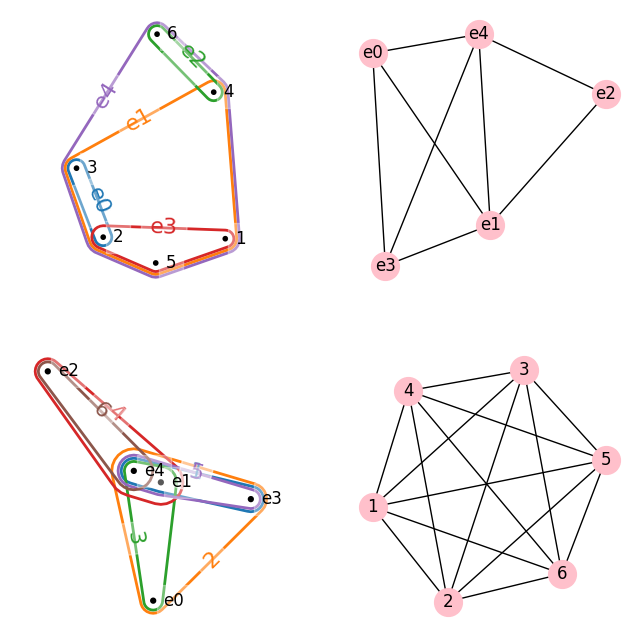

In [87]:
scenes = {'e0': [3, 2], 'e1': [2, 4, 1, 5, 3], 'e2': [4, 6], 'e3': [5, 1, 2], 'e4': [3, 2, 1, 5, 4, 6]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e1', 'e3'], 2: ['e0', 'e2', 'e4'], 3: ['e0', 'e2', 'e4'], 4: ['e0', 'e3', 'e4'], 5: ['e0', 'e1'], 6: ['e0', 'e2', 'e4']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


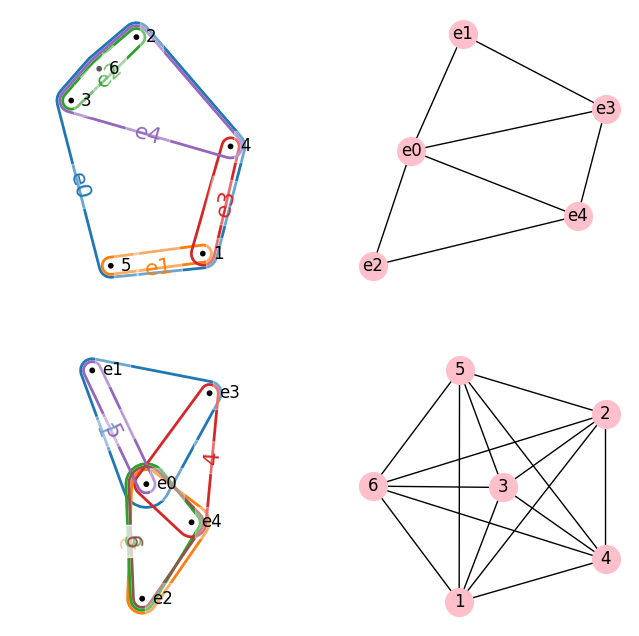

In [88]:
scenes = {'e0': [1, 5, 4, 2, 6, 3], 'e1': [5, 1], 'e2': [6, 3, 2], 'e3': [4, 1], 'e4': [3, 6, 4, 2]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e3', 'e4'], 2: ['e2', 'e3', 'e4'], 3: ['e2', 'e3', 'e4'], 4: ['e1', 'e3', 'e4'], 5: ['e0', 'e1', 'e4'], 6: ['e1']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


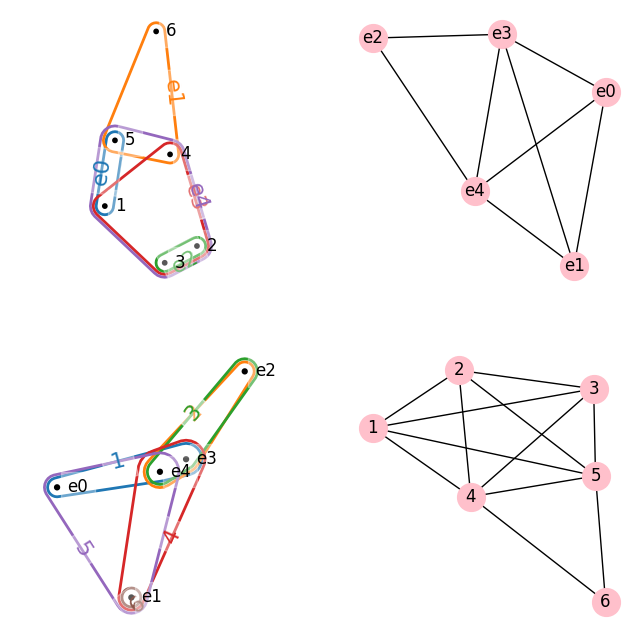

In [89]:
scenes = {'e0': [5, 1], 'e1': [4, 6, 5], 'e2': [2, 3], 'e3': [4, 3, 2, 1], 'e4': [5, 1, 3, 2, 4]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e2', 'e3', 'e4'], 2: ['e0', 'e1', 'e2', 'e4'], 3: ['e2', 'e4'], 4: ['e0', 'e4'], 5: ['e1'], 6: ['e0', 'e3', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


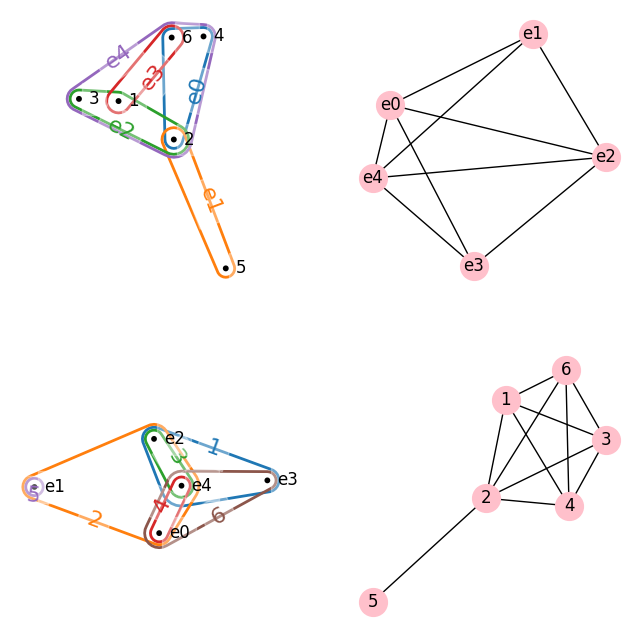

In [90]:
scenes = {'e0': [2, 4, 6], 'e1': [2, 5], 'e2': [1, 3, 2], 'e3': [6, 1], 'e4': [6, 2, 4, 1, 3]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e2', 'e3'], 2: ['e1', 'e3', 'e4'], 3: ['e0', 'e1', 'e3', 'e4'], 4: ['e0', 'e1', 'e3', 'e4'], 5: ['e0', 'e2', 'e3', 'e4'], 6: ['e2', 'e3', 'e4']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


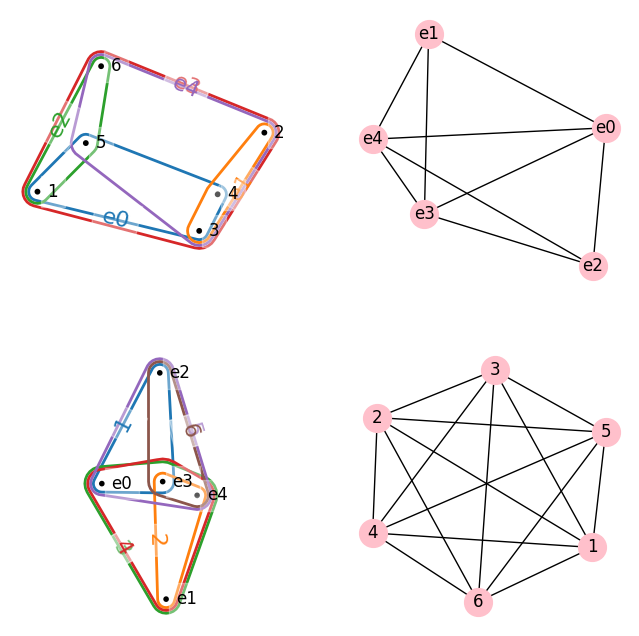

In [91]:
scenes = {'e0': [5, 4, 3, 1], 'e1': [4, 2, 3], 'e2': [1, 5, 6], 'e3': [2, 5, 3, 1, 6, 4], 'e4': [5, 4, 2, 3, 6]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e2', 'e3', 'e4'], 2: ['e0', 'e4'], 3: ['e0', 'e2', 'e3', 'e4'], 4: ['e0', 'e2', 'e3'], 5: ['e0', 'e1', 'e3', 'e4'], 6: ['e0', 'e1', 'e3']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


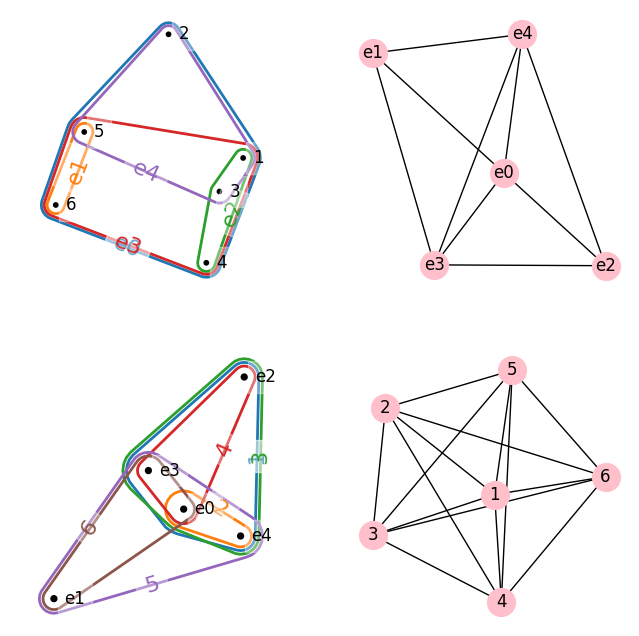

In [92]:
scenes = {'e0': [6, 3, 1, 5, 4, 2], 'e1': [6, 5], 'e2': [1, 4, 3], 'e3': [5, 1, 3, 4, 6], 'e4': [2, 1, 3, 5]}
check(scenes)

In [93]:
scenes = {"e0": [1, 3, 4, 5, 6], "e1": [3, 4, 5, 6], "e2": [1, 2, 3, 4, 5], "e3": [1, 3, 5, 6], "e4": [1, 6]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e2', 'e3', 'e4'], 2: ['e2'], 3: ['e0', 'e1', 'e2', 'e3'], 4: ['e0', 'e1', 'e2'], 5: ['e0', 'e1', 'e2', 'e3'], 6: ['e0', 'e1', 'e3', 'e4']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e1', 'e2'], 2: ['e1', 'e4'], 3: ['e1', 'e3', 'e4'], 4: ['e0', 'e1', 'e2', 'e3', 'e4'], 5: ['e0', 'e1', 'e4'], 6: ['e0', 'e2', 'e3']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


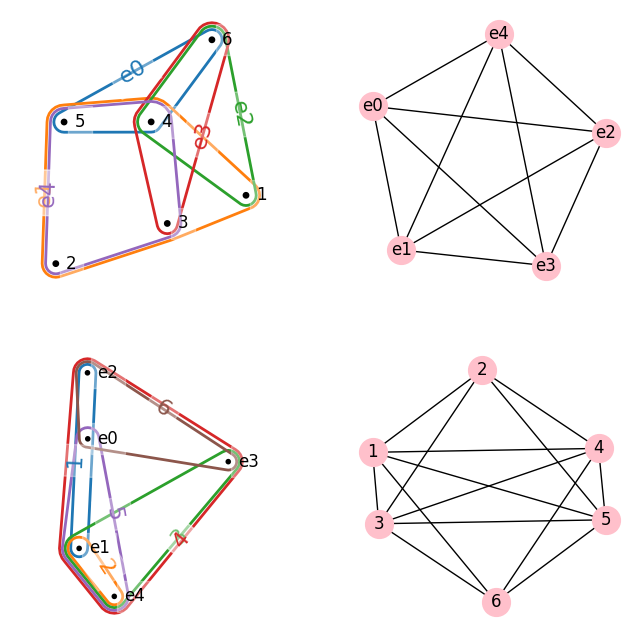

In [96]:
scenes = {"e0": [4, 5, 6], "e1": [1, 2, 3, 4, 5], "e2": [1, 4, 6], "e3": [3, 4, 6], "e4": [2, 3, 4, 5]}
check(scenes)

# 8 Vertices, 5 Hyperedges

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e1', 'e2'], 2: ['e0', 'e1', 'e2', 'e3'], 3: ['e0', 'e1', 'e4'], 4: ['e0', 'e1', 'e2', 'e4'], 5: ['e0', 'e2', 'e3'], 6: ['e0', 'e3'], 7: ['e0', 'e1', 'e2'], 8: ['e0', 'e3', 'e4']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


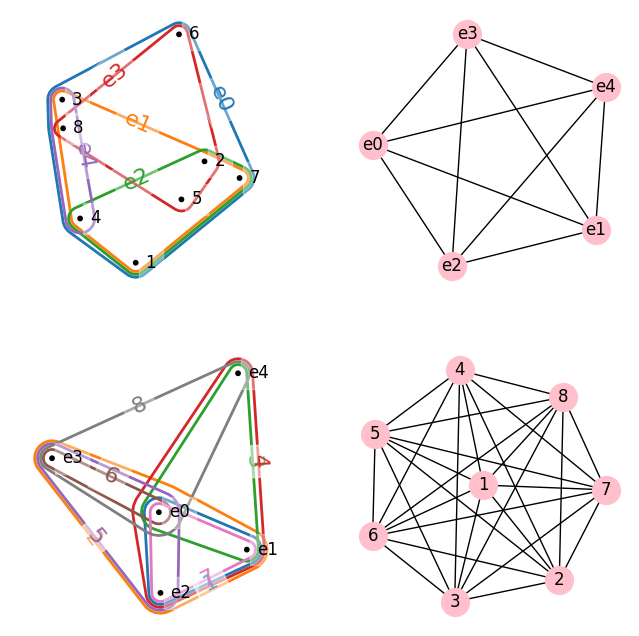

In [94]:
scenes = {'e0': [7, 5, 6, 1, 8, 2, 4, 3], 'e1': [7, 4, 3, 2, 1], 'e2': [4, 2, 5, 7, 1], 'e3': [2, 8, 5, 6], 'e4': [8, 3, 4]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e1', 'e2', 'e3', 'e4'], 2: ['e0', 'e1', 'e3'], 3: ['e0', 'e1', 'e2', 'e3'], 4: ['e1', 'e3'], 5: ['e0', 'e1', 'e2', 'e3', 'e4'], 6: ['e1', 'e2', 'e4']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


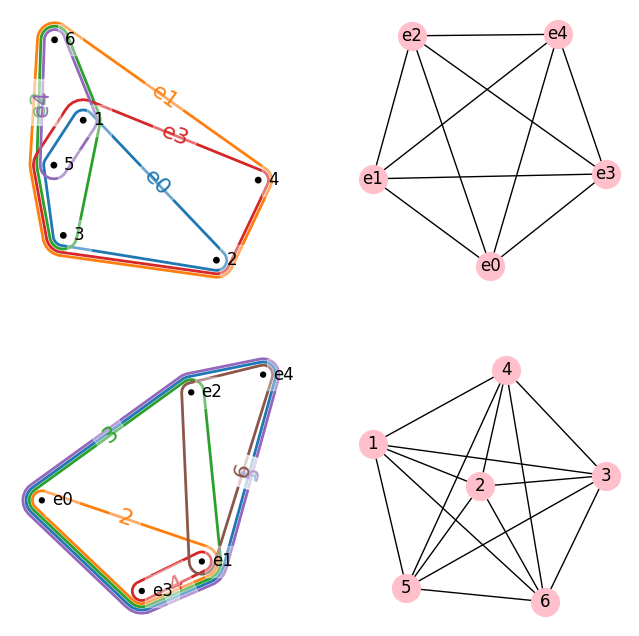

In [98]:
scenes = {"e0": [1, 2, 3, 5], "e1": [1, 2, 3, 4, 5, 6], "e2": [1, 3, 5, 6], "e3": [1, 2, 3, 4, 5], "e4": [1, 5, 6]}
check(scenes)

# 6 Vertices, 4 Hyperedges

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e0', 'e3'], 2: ['e0', 'e2'], 3: ['e3'], 4: ['e2', 'e3'], 5: ['e1', 'e3'], 6: ['e0', 'e1', 'e2']}
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True


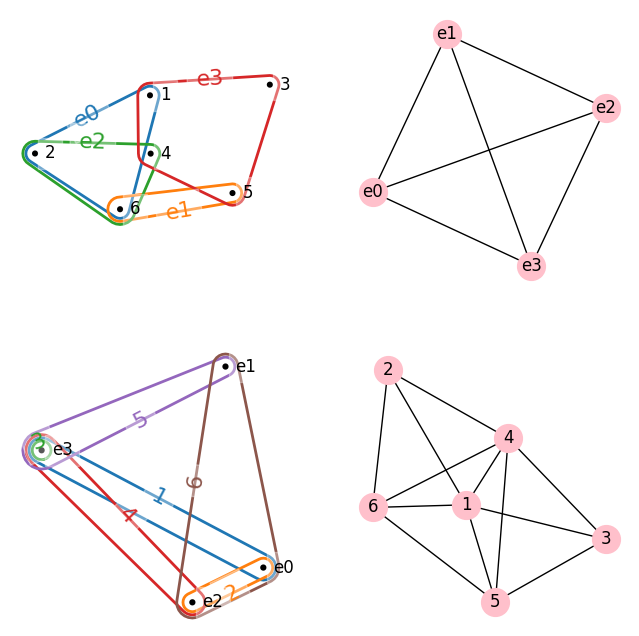

In [99]:
scenes = {"e0": [1, 2, 6], "e1": [5, 6], "e2": [2, 4, 6], "e3": [1, 3, 4, 5]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e1', 'e3'], 2: ['e2', 'e3'], 3: ['e1', 'e2', 'e3'], 4: ['e0', 'e1', 'e2'], 5: ['e1', 'e2', 'e3'], 6: ['e0', 'e2', 'e3']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


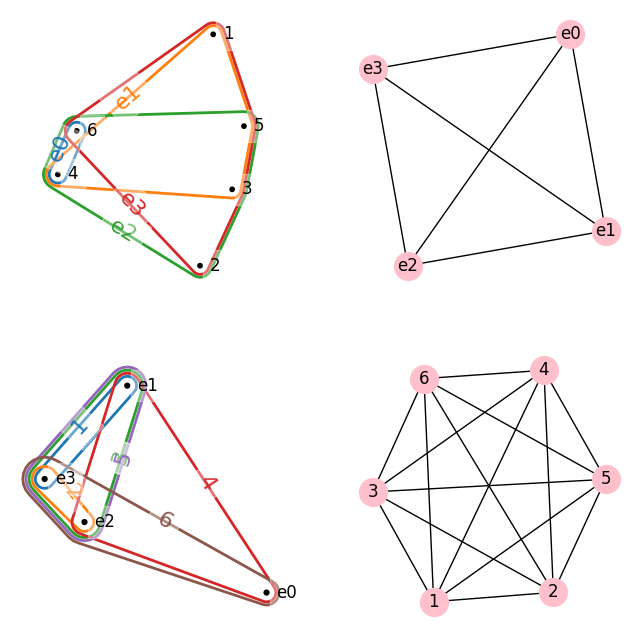

In [100]:
scenes = {"e0": [4, 6], "e1": [1, 3, 4, 5], "e2": [2, 3, 4, 5, 6], "e3": [1, 2, 3, 5, 6]}
check(scenes)

In [101]:
scenes = {"e0": [4, 6], "e1": [1, 3, 4, 5], "e2": [2, 3, 4, 5, 6], "e3": [1, 2, 3, 5, 6]}
check(scenes)

Original Hypergraph: 
Alpha-acyclic:  False
Beta-acyclic:  False
The line graph is chordal:  True

Dual of the Hypergraph: 
Dual:  {1: ['e1', 'e3'], 2: ['e2', 'e3'], 3: ['e1', 'e2', 'e3'], 4: ['e0', 'e1', 'e2'], 5: ['e1', 'e2', 'e3'], 6: ['e0', 'e2', 'e3']}
Alpha-acyclic:  True
Beta-acyclic:  False
The line graph is chordal:  True


In [104]:
plt.title({"e0": [1, 2, 3, 4, 5, 6], "e1": [1, 5], "e2": [2, 3, 6], "e3": [1, 4], "e4": [2, 3, 4, 6]})

H = hnx.Hypergraph({"e0": [1, 2, 3, 4, 5, 6], "e1": [1, 5], "e2": [2, 3, 6], "e3": [1, 4], "e4": [2, 3, 4, 6]})
kwargs = {'layout_kwargs': {'seed': 8}, 'with_node_counts': False}
hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 24
    },
    edge_labels_kwargs={
        'fontsize': 36
    },
    edges_kwargs={
        'linewidths': 4
    },
    **kwargs
)